# Performance Evaluation

In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta
from typing import Optional

plt.rcParams['figure.figsize'] = (15, 10)
#plt.rcParams["figure.autolayout"] = True

with pd.HDFStore('../DoublyLinkedStore.h5') as store:
    lowStore = store['results']
    
with pd.HDFStore('../DoublyLinkedHighStore.h5') as store:
    highStore = store['results']
    
    
humanTaskNames = {
    "infer": "OWL inference task (HermiT)",
    "sparql": "SPARQL (Jena ARQ)",
    "buildkb": "KB mapping",
    "shacl": "SHACL (Jena)"
}

taskColors = {
    "infer": "#0083CC",
    "sparql": "#F5A300",
    "buildkb": "#009D81",
    "shacl": "#C9308E"
}

taskOrder = {
    "buildkb": 0,
    "sparql": 1,
    "shacl": 2,
    "infer": 3,
}
    

def plotTaskComparison(store, metric, frameTransform, labelMaker, ymax: Optional[float]):
    tasks = store[metric].iloc[0].keys()
    tasks = [task for task in tasks if task in humanTaskNames]
    tasks.sort(key=lambda x: taskOrder.get(x, max(taskOrder.values()) + 1))
    labels = store.index
    
    x = np.arange(len(labels))  # the label locations
    width = 0.8  # the width of the bars
    
    fig, ax = plt.subplots()
    
    idx = 0
    for task in tasks:
      frame = frameTransform(store[metric].transform(lambda x: x[task]))
      subfig = ax.bar((x + (idx * width/len(tasks))) - width/2+width/len(tasks)/2, frame, width=width/len(tasks), label=task, color=taskColors[task])
      ax.bar_label(subfig, labels=labelMaker(frame), padding=3)
      #fig.set_yscale('symlog')
      idx = idx + 1
    
      display(frame)
    
    plt.legend([humanTaskNames[task] for task in tasks])
    ax.set_xticks(x, labels)
    if ymax:
      ax.set_ylim([0, ymax])
    
    fig.tight_layout()
    plt.show()
    
def plotTaskTimeComparison(store, ymax):
    return plotTaskComparison(
        store,
        'times',
        lambda frame: frame.astype('timedelta64[ns]').transform(lambda x: x / timedelta(seconds=1)),
        lambda frame: ["{:.2f}s".format(f) for f in frame],
        ymax
    )

def plotTaskMemoryComparison(store, ymax):
    return plotTaskComparison(
        store,
        'memory',
        lambda frame: frame.transform(lambda x: x / (1024 * 1024)),
        lambda frame: ["{:.2f}MiB".format(v) for v in frame],
        ymax
    )

# Low Range

30     2.762603
40     2.566096
50     2.485593
100    2.324340
200    2.458919
500    2.793988
Name: times, dtype: float64

30     0.157159
40     0.185176
50     0.179340
100    0.181857
200    0.180534
500    0.219104
Name: times, dtype: float64

30     0.059139
40     0.076041
50     0.077379
100    0.081152
200    0.124487
500    0.237785
Name: times, dtype: float64

30      5.985824
40      7.151434
50      7.194679
100    12.206445
200    22.288867
500    60.000000
Name: times, dtype: float64

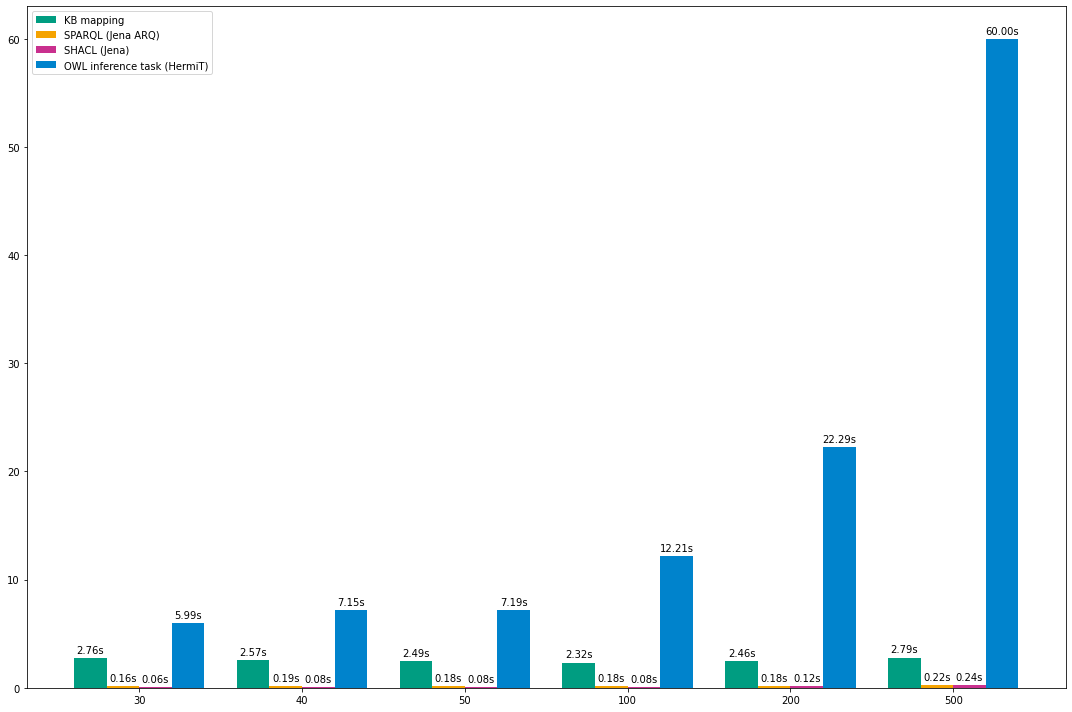

In [63]:
plotTaskTimeComparison(lowStore, ymax=None)

30     2.652901
40     2.642365
50     2.392156
100    2.481487
200    2.447498
500    2.557790
Name: times, dtype: float64

30     0.169841
40     0.154309
50     0.149642
100    0.162531
200    0.268744
500    0.221427
Name: times, dtype: float64

30     0.101408
40     0.095980
50     0.141666
100    0.148643
200    0.172216
500    0.191517
Name: times, dtype: float64

30      7.625884
40      7.258824
50      7.175046
100    11.113219
200    22.759669
500    60.000000
Name: times, dtype: float64

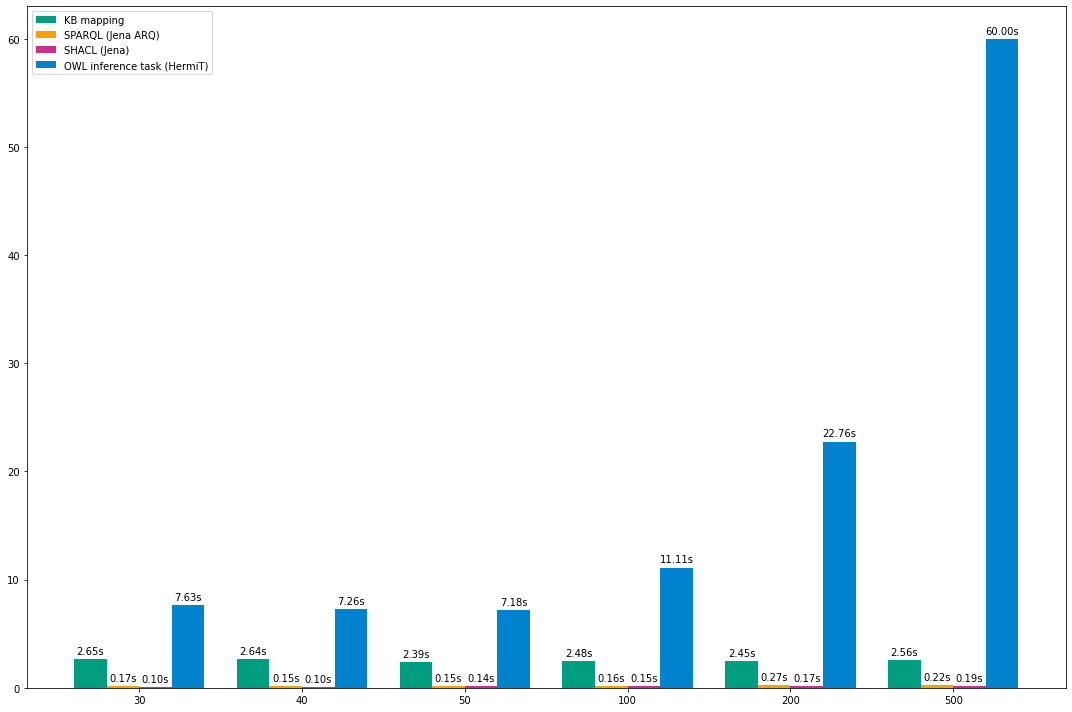

In [81]:
plotTaskTimeComparison(lowStore, ymax=None)
# warmup makes a large difference, compare this and below

30     2.920790
40     2.455288
50     3.406786
100    4.145239
200    3.169805
500    4.490549
Name: times, dtype: float64

30     0.178684
40     0.171503
50     0.179526
100    0.270403
200    0.186139
500    0.377981
Name: times, dtype: float64

30     0.111463
40     0.133423
50     0.113648
100    0.220040
200    0.205508
500    0.262583
Name: times, dtype: float64

30      7.129773
40      7.624361
50      9.006824
100    14.362273
200    25.575298
500    60.000000
Name: times, dtype: float64

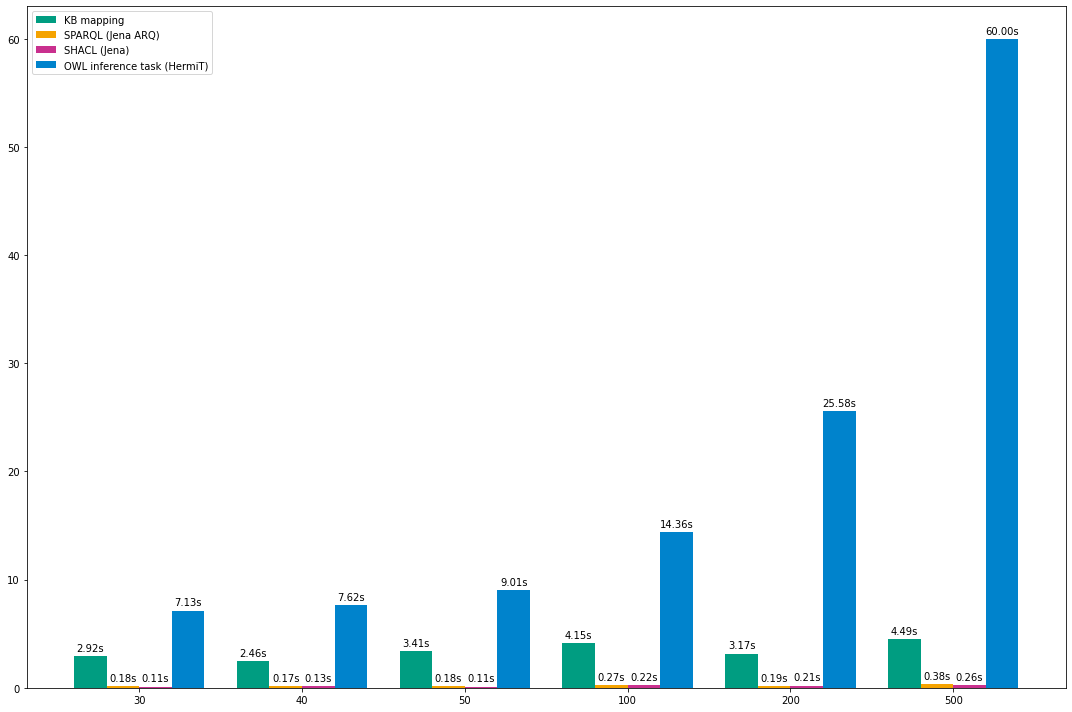

In [117]:
plotTaskTimeComparison(lowStore, ymax=None)

30     457.348598
40     446.972995
50     450.700352
100    460.024571
200    447.581973
500    501.672192
Name: memory, dtype: float64

30     395.575340
40     408.002194
50     283.835381
100    408.299504
200    416.464282
500    426.941025
Name: memory, dtype: float64

30     338.535960
40     332.841484
50     343.340195
100    326.908597
200    374.210875
500    418.844429
Name: memory, dtype: float64

30     477.970706
40     493.201730
50     480.997752
100    483.937689
200    488.246698
500    623.260353
Name: memory, dtype: float64

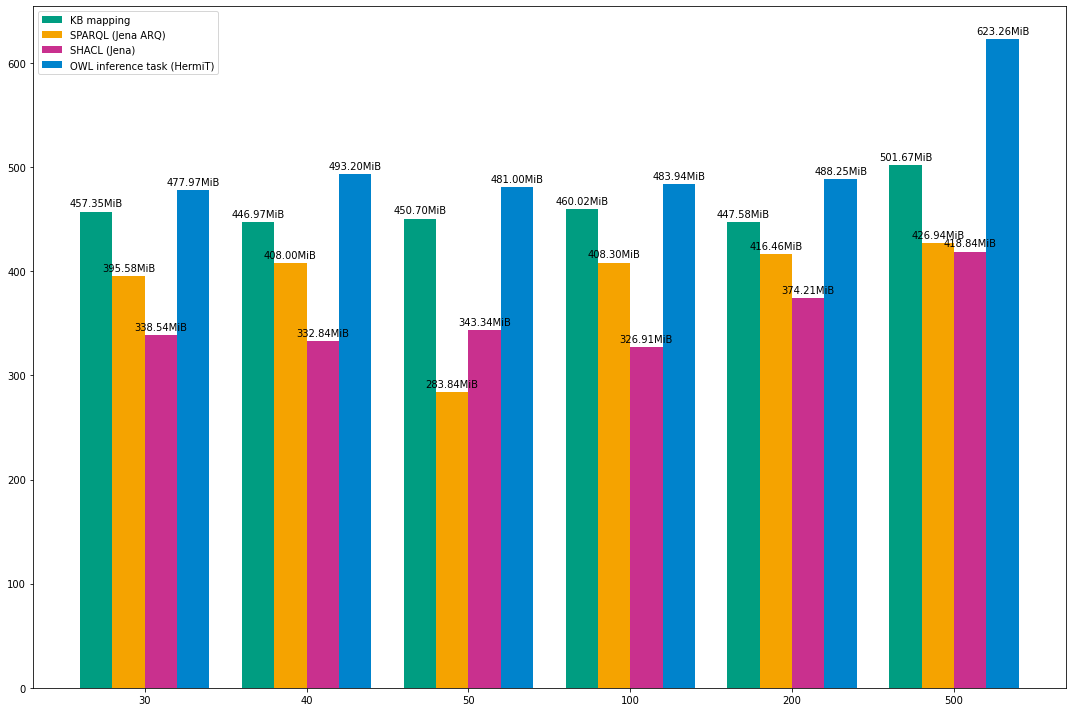

In [108]:
plotTaskMemoryComparison(lowStore, ymax=None)

30     141.737541
40     141.723389
50     139.756508
100    137.803932
200    140.320007
500    144.088364
Name: memory, dtype: float64

30     143.631943
40     145.979599
50     146.009071
100    144.619484
200    147.072174
500    148.757881
Name: memory, dtype: float64

30     143.894028
40     143.957199
50     142.187538
100    149.790977
200    145.246056
500    146.851677
Name: memory, dtype: float64

30     427.516975
40     416.945694
50     459.648399
100    478.702362
200    466.778999
500    499.254539
Name: memory, dtype: float64

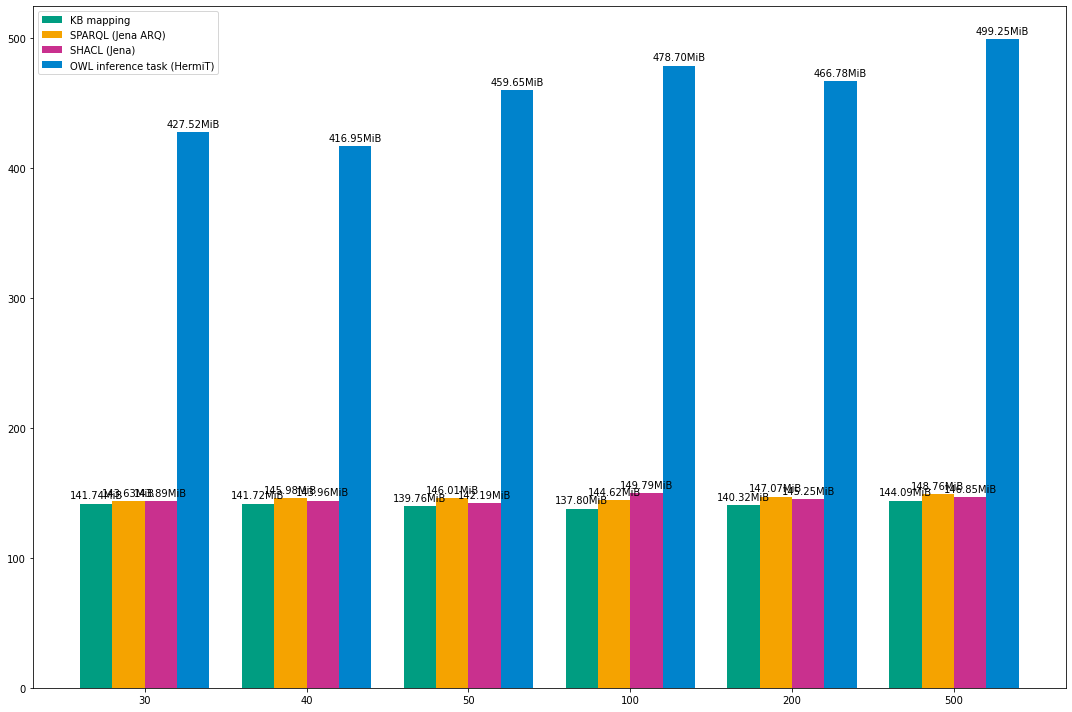

In [116]:
plotTaskMemoryComparison(lowStore, ymax=None)

# High Range

500      2.803354
1500     3.283312
2500     3.911343
3500     4.916305
4500     5.572690
5500     6.875056
6500     7.264097
7500     8.470178
8500     9.397650
9500    12.095916
Name: times, dtype: float64

500     0.231579
1500    0.225039
2500    0.323689
3500    0.285503
4500    0.334228
5500    0.330418
6500    0.353789
7500    0.427583
8500    0.448908
9500    0.404647
Name: times, dtype: float64

500     0.182146
1500    0.320236
2500    0.351501
3500    0.537658
4500    0.551638
5500    0.662383
6500    0.687023
7500    0.867469
8500    0.875923
9500    0.908290
Name: times, dtype: float64

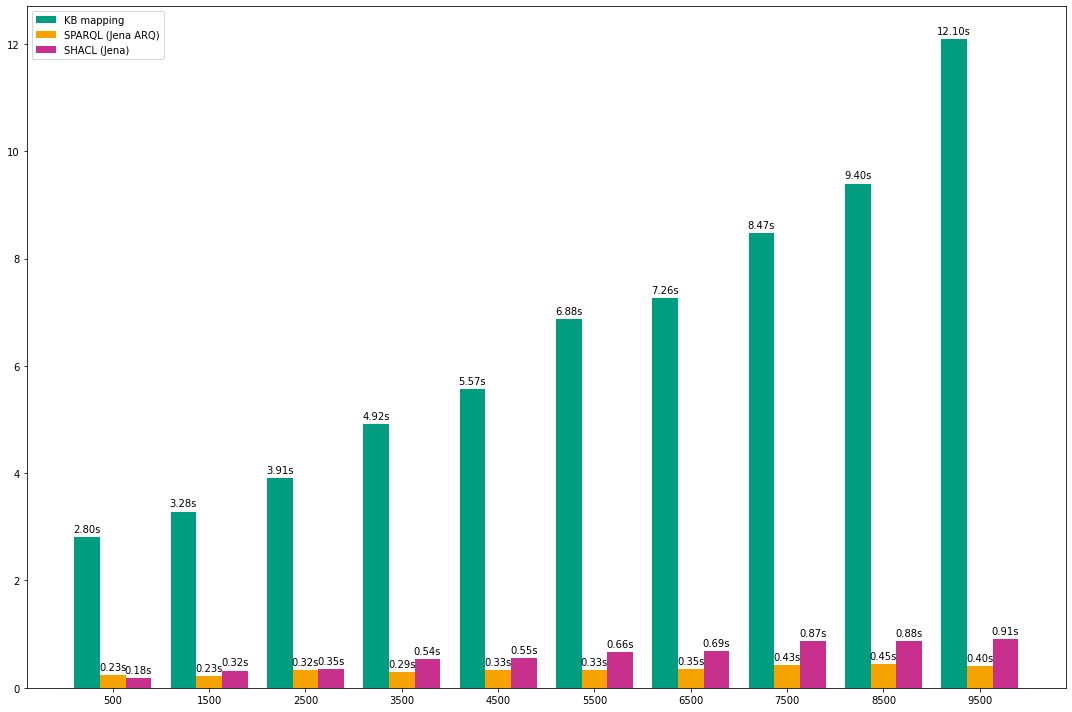

In [64]:
plotTaskTimeComparison(highStore, ymax=None)

500     3.282115
1500    5.112683
2500    4.536894
3500    7.897415
4500    5.692009
5500    5.554561
6500    7.106819
7500    6.588177
8500    8.609453
9500    9.209669
Name: times, dtype: float64

500     0.236948
1500    0.298083
2500    0.398523
3500    0.436202
4500    0.421117
5500    0.407078
6500    0.410089
7500    0.506060
8500    0.510360
9500    0.550111
Name: times, dtype: float64

500     0.264640
1500    0.347154
2500    0.498996
3500    0.732928
4500    0.722990
5500    0.908090
6500    0.960796
7500    0.936696
8500    1.371252
9500    1.095133
Name: times, dtype: float64

500     60.0
1500    60.0
2500    60.0
3500    60.0
4500    60.0
5500    60.0
6500    60.0
7500    60.0
8500    60.0
9500    60.0
Name: times, dtype: float64

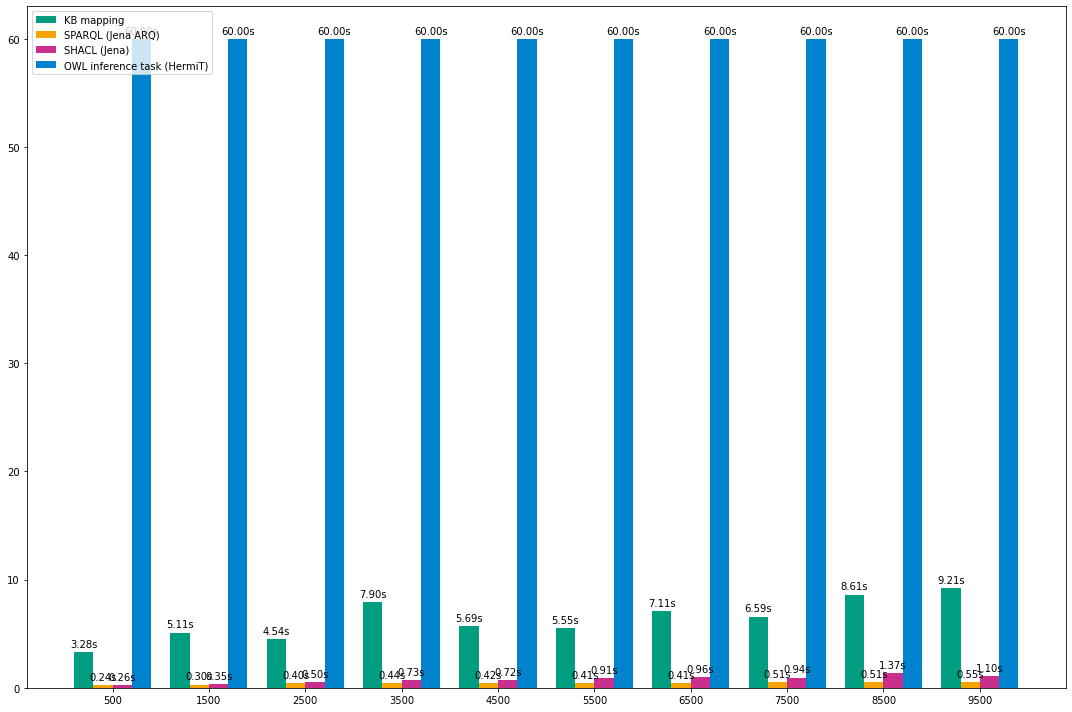

In [120]:
plotTaskTimeComparison(highStore, ymax=None)

500     140.770897
1500    169.707809
2500    246.195007
3500    342.172195
4500    301.605698
5500    382.645882
6500    480.258636
7500    577.950241
8500    822.560547
9500    925.529480
Name: memory, dtype: float64

500     148.535934
1500    179.418877
2500    220.150627
3500    269.857643
4500    324.267059
5500    554.556473
6500    500.510559
7500    607.224747
8500    723.302185
9500    930.566689
Name: memory, dtype: float64

500     144.257652
1500    233.261742
2500    218.730721
3500    480.204941
4500    452.958160
5500    469.622124
6500    536.047577
7500    778.017349
8500    777.322952
9500    888.595200
Name: memory, dtype: float64

500      443.229385
1500     535.209740
2500     537.531372
3500     552.047821
4500     656.016075
5500     750.867928
6500     757.114304
7500     897.568260
8500    1042.871437
9500    1045.964798
Name: memory, dtype: float64

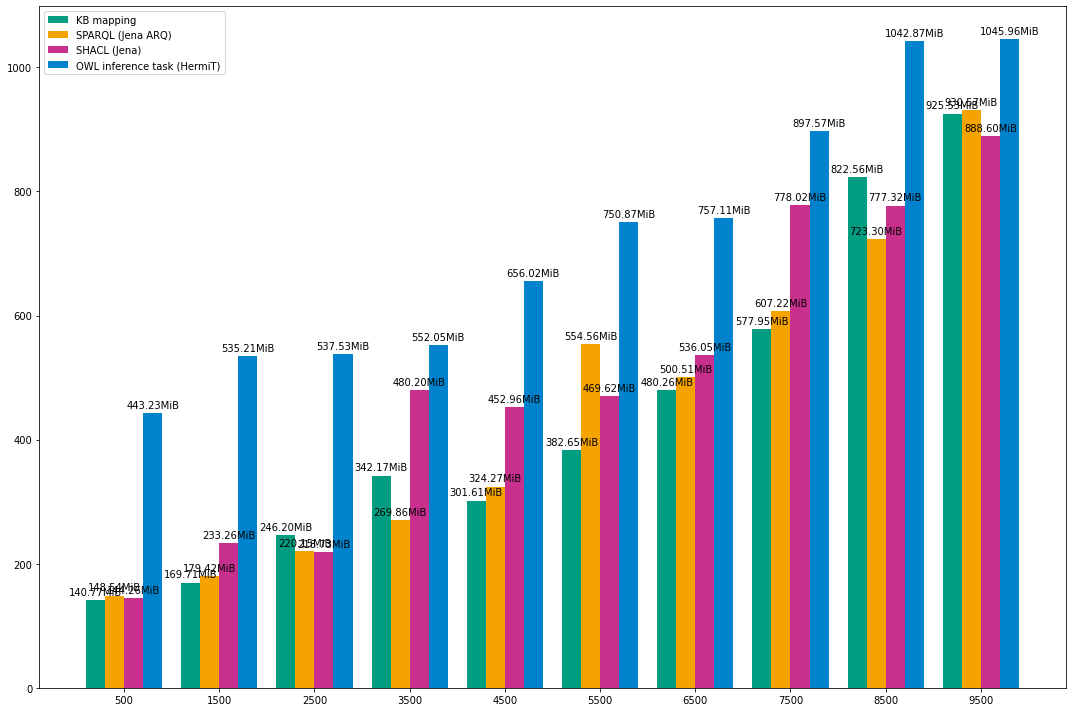

In [121]:
plotTaskMemoryComparison(highStore, ymax=None)